# **Project Overview**
The NYC Taxi and Limousine Commission has contracted with Automatidata to Build a machine learning model that
predicts ride durations.

This part is related to the Exploratory Data Analysis.
I will explore the data set to **discover**, **clean**, **structure**, while **validating**.
I will **present** the discoveries in visual forms.

# **EDA**
# **Plan**-**Analyse**-**Construct**-**Execute**


Having in mind the PACE stages, the follwoing are the steps to consider for EDA:

   - Determineate state of the data observing:
     - Data types.
     - Missing information.
     - Validate inputs.
     - Distributions.
     - Detrminate Outliers, **Do we keep/delete them?**.
     - Verify as we go.
   - Determinate if transformations or restructurizations are neccesary
     - String data into Date/Time objects.
     - Creation of new columns based on known information.
   - Construct Visualizations
   - Determinate insights, recommendations, new formulated questions from the observed.

   


In [1]:
## loading libraries in memory 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import eda_functions as eda

import scipy
## For encoding
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [2]:
## Path of the csv file
path  = '~/Scripts/DS/DataIntoInsights/W5_project/data/2017_Yellow_Taxi_Trip_Data.csv'

## Defining and observing the first 5 exemples:
df = pd.read_csv(path)

In [3]:

## New column names
new_column_names = ['unnamed', 'vendorID', 'pickup_dt',
       'dropoff_dt', 'psgr_count', 'distance',
       'ratecodeID', 'store_and_fwd_flag', 'pickUpLocId', 'dOffLocID',
       'paymenType', 'fareAmnt', 'extra', 'mtaTax', 'tip',
       'tollsAmount', 'improvementSrchrg', 'totalAmount']

# Rename columns with list
df.set_axis(new_column_names, axis=1,inplace=True)
df.head()


,unnamed,vendorID,pickup_dt,dropoff_dt,psgr_count,distance,ratecodeID,store_and_fwd_flag,pickUpLocId,dOffLocID,paymenType,fareAmnt,extra,mtaTax,tip,tollsAmount,improvementSrchrg,totalAmount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.dtypes

unnamed                 int64
vendorID                int64
pickup_dt              object
dropoff_dt             object
psgr_count              int64
distance              float64
ratecodeID              int64
store_and_fwd_flag     object
pickUpLocId             int64
dOffLocID               int64
paymenType              int64
fareAmnt              float64
extra                 float64
mtaTax                float64
tip                   float64
tollsAmount           float64
improvementSrchrg     float64
totalAmount           float64
dtype: object

In [5]:
## checking form invalid items

## invalid_list = [np.nan, None, [], {}, 'NaN', 'Null','NULL',
##                'None','NA','?','-', '--','.','', ' ', '   ']

eda.invalid_df(df)

,columns,nulls,invalids,unique_item
0,unnamed,0,0,"[24870114, 35634249, 106203690, 38942136, 3084..."
1,vendorID,0,0,"[2, 1]"
2,pickup_dt,0,0,"[03/25/2017 8:55:43 AM, 04/11/2017 2:53:28 PM,..."
3,dropoff_dt,0,0,"[03/25/2017 9:09:47 AM, 04/11/2017 3:19:58 PM,..."
4,psgr_count,0,0,"[6, 1, 2, 4, 5, 3, 0]"
5,distance,0,0,"[3.34, 1.8, 1.0, 3.7, 4.37, 2.3, 12.83, 2.98, ..."
6,ratecodeID,0,0,"[1, 2, 5, 3, 4, 99]"
7,store_and_fwd_flag,0,0,"[N, Y]"
8,pickUpLocId,0,0,"[100, 186, 262, 188, 4, 161, 79, 237, 234, 239..."
9,dOffLocID,0,0,"[231, 43, 236, 97, 112, 241, 114, 249, 237, 14..."


In [6]:
## Missing values?
eda.miss_df(df)

,Total,Percent
unnamed,0,0.0
vendorID,0,0.0
improvementSrchrg,0,0.0
tollsAmount,0,0.0
tip,0,0.0
mtaTax,0,0.0
extra,0,0.0
fareAmnt,0,0.0
paymenType,0,0.0
dOffLocID,0,0.0


In [7]:
## Descriptive stadistics.
df.describe()

,unnamed,vendorID,psgr_count,distance,ratecodeID,pickUpLocId,dOffLocID,paymenType,fareAmnt,extra,mtaTax,tip,tollsAmount,improvementSrchrg,totalAmount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
## Converting columns with date and time info to a datetime objetc
df['pickup_dt']  = pd.to_datetime(df['pickup_dt'])
df['dropoff_dt'] = pd.to_datetime(df['dropoff_dt'])

In [9]:
## Encoding categorical data
le = LabelEncoder()
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])

In [10]:
df['store_and_fwd_flag'].unique()

array([0, 1])

In [11]:
## Number of examples with store_and_fwd_flag no
len(df[df['store_and_fwd_flag'] == 0]) ## no

22600

In [12]:
len(df[df['store_and_fwd_flag'] == 1]) ## yes

99

In [13]:
## observing
df.dtypes

unnamed                        int64
vendorID                       int64
pickup_dt             datetime64[ns]
dropoff_dt            datetime64[ns]
psgr_count                     int64
distance                     float64
ratecodeID                     int64
store_and_fwd_flag             int64
pickUpLocId                    int64
dOffLocID                      int64
paymenType                     int64
fareAmnt                     float64
extra                        float64
mtaTax                       float64
tip                          float64
tollsAmount                  float64
improvementSrchrg            float64
totalAmount                  float64
dtype: object

In [14]:
## What is the Unnamed: 0?
## I think was an unique ID.
## Are they unique values?
## not sure what it is but all the values are unique.
len(df) == len(df['unnamed'])

True

In [15]:
len(df['ratecodeID'].unique())

6

In [16]:
## date time periods

In [17]:
## The year is only 2017, so we dont need the year
##
df['week'] = df['pickup_dt'].dt.strftime('%V')
df['month'] = df['pickup_dt'].dt.strftime('%m')
df['quarter'] = df['pickup_dt'].dt.to_period('Q').dt.strftime('%q')
df['day'] = df['pickup_dt'].dt.strftime('%A')
df['hour'] = df['pickup_dt'].dt.strftime('%H')

In [18]:
Df = df.sort_values(by='pickup_dt', ascending=True).reset_index().drop(['index'], axis=1)

## Validating dates
We need a way to determinate wich dates are missing.
We will compare the dates that we have with a syntethic date range.
The function `pd.daterange()` will create a datetime index off all dates between a start and end date (inclusive) given as arguments.
[pd.date_range() manPage](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)

Seems we have from jan 1 to dec 31, all days

In [19]:
Df['pickup_dt'][0]

Timestamp('2017-01-01 00:08:25')

In [20]:
Df['pickup_dt'][22698]

Timestamp('2017-12-31 23:45:30')

In [21]:
## Checking just for the days present
## .strftime('%d/%m/%Y')
Df['Y_m_d'] = Df['pickup_dt'].dt.strftime('%Y-%m-%d')
Df['Y_m_d']  = pd.to_datetime(Df['Y_m_d']).dt.strftime('%Y-%m-%d')
Df['Y_m_d'][0]

'2017-01-01'

In [22]:
Df['Y_m_d'][22698]

'2017-12-31'

In [23]:
## Validating dates, finding missing values with a calendar index
## Here we observe that ther is no difference.

full_2017 = pd.full_date_range = pd.date_range(start =Df['Y_m_d'][0], end = Df['Y_m_d'][22698])
full_2017.difference(Df['Y_m_d'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [24]:
## no difference.
Df.drop(['Y_m_d'], axis=1, inplace=True)

In [25]:
## Trying to obtain the time spend in the taxi.

In [26]:
Df['tripTime'] = (Df['dropoff_dt'] - Df['pickup_dt']).dt.seconds / 60

In [27]:
## Trips in minutes
Df['tripTime']

0         8.916667
1         9.616667
2        14.183333
3         4.650000
4        12.216667
           ...    
22694    32.800000
22695    42.883333
22696    17.550000
22697     8.583333
22698     3.900000
Name: tripTime, Length: 22699, dtype: float64

In [28]:
## New columns order
nnewOrder = ['unnamed', 'vendorID', 'pickup_dt', 'dropoff_dt', 'week', 'month',
       'quarter', 'day', 'hour', 'tripTime','distance', 'psgr_count',
        'ratecodeID', 'store_and_fwd_flag', 'pickUpLocId',
       'dOffLocID', 'paymenType', 'fareAmnt', 'extra', 'mtaTax', 'tip',
       'tollsAmount', 'improvementSrchrg', 'totalAmount']

In [29]:
## applying new order
Df = Df[nnewOrder]

In [30]:
## observing the duration of the rides
## in minutes
(Df['tripTime'] / 60).describe()

count    22699.000000
mean         0.284620
std          1.044909
min          0.000000
25%          0.110833
50%          0.186389
75%          0.306389
max         23.992500
Name: tripTime, dtype: float64

In [31]:
Df.head()

,unnamed,vendorID,pickup_dt,dropoff_dt,week,month,quarter,day,hour,tripTime,...,pickUpLocId,dOffLocID,paymenType,fareAmnt,extra,mtaTax,tip,tollsAmount,improvementSrchrg,totalAmount
0,111133227,2,2017-01-01 00:08:25,2017-01-01 00:17:20,52,01,1,Sunday,00,8.916667,...,237,161,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30
1,111139506,1,2017-01-01 00:26:35,2017-01-01 00:36:12,52,01,1,Sunday,00,9.616667,...,234,164,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55
2,111145951,1,2017-01-01 00:43:10,2017-01-01 00:57:21,52,01,1,Sunday,00,14.183333,...,261,233,2,17.0,0.5,0.5,0.00,0.0,0.3,18.30
3,111147465,2,2017-01-01 00:47:06,2017-01-01 00:51:45,52,01,1,Sunday,00,4.650000,...,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16
4,111055119,1,2017-01-01 01:21:59,2017-01-01 01:34:12,52,01,1,Sunday,01,12.216667,...,170,158,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30


In [32]:
Df.dtypes

unnamed                        int64
vendorID                       int64
pickup_dt             datetime64[ns]
dropoff_dt            datetime64[ns]
week                          object
month                         object
quarter                       object
day                           object
hour                          object
tripTime                     float64
distance                     float64
psgr_count                     int64
ratecodeID                     int64
store_and_fwd_flag             int64
pickUpLocId                    int64
dOffLocID                      int64
paymenType                     int64
fareAmnt                     float64
extra                        float64
mtaTax                       float64
tip                          float64
tollsAmount                  float64
improvementSrchrg            float64
totalAmount                  float64
dtype: object

# Plan-**Analyse**-Construct-Execute

## Re-grouping

**Initial measurements and inferences**

   - Determineate state of the data observing:
     - Data types.
         **All data is numerical or datetime64(ns)**
     - Missing information.
         **No**
     - Validate inputs.
         **dates are continious without missing days** 
         **We have other extremes values that require further investigation**
     - Distributions.
     - Detrminate Outliers, **Do we keep/delete them?**.
   - Determinate if transformations or restructurizations are neccesary
     - String data into Date/Time objects.
         **Done** **Also obtain week, month, quarter, day, hour, and trip time**
     - Creation of new columns based on known information.
         **Si**
   - Construct Visualizations
   - Determinate insights, recommendations, new formulated questions from the observed. 
   

In [33]:
## the average total amount per month
Df[['month', 'totalAmount']].groupby(['month']).mean()

,totalAmount
month,
01,15.891462
02,16.358332
03,16.147335
04,15.855641
05,16.805057
06,16.761976
07,15.685115
08,16.101833
09,16.266655


In [34]:
## the average total amount per day
Df[['day', 'totalAmount']].groupby(['day']).mean()

,totalAmount
day,
Friday,16.354744
Monday,16.913808
Saturday,15.205049
Sunday,16.218833
Thursday,16.808322
Tuesday,16.424997
Wednesday,16.315773


In [35]:
## Average total amount 
Df[['hour', 'totalAmount']].groupby(['hour']).mean()

,totalAmount
hour,
00,16.388073
01,14.804438
02,15.220829
03,16.485645
04,18.197745
05,24.180170
06,16.263427
07,14.454912
08,15.361255


In [36]:
## Identifying the 20 bussiest pick up locations that appears the most
Df['pickUpLocId'].value_counts()[:20]

237    890
161    861
186    792
236    785
162    779
170    749
234    749
48     741
230    739
142    649
138    623
79     617
163    611
107    590
239    583
164    576
68     555
132    532
141    488
249    483
Name: pickUpLocId, dtype: int64

In [37]:
## Identifying the 20 less bussiest pick up locations 
## that appears not that much
Df['pickUpLocId'].value_counts()[131:]

57     1
242    1
178    1
118    1
185    1
213    1
160    1
173    1
153    1
54     1
175    1
10     1
159    1
215    1
69     1
123    1
218    1
135    1
208    1
202    1
128    1
Name: pickUpLocId, dtype: int64

In [38]:
## count total amount of days and its average
## with Wed, Thu and Friday higher count of days
df.groupby(['day']).agg({'totalAmount':'mean','day':'count'})               

,totalAmount,day
day,,
Friday,16.354744,3413
Monday,16.913808,2931
Saturday,15.205049,3367
Sunday,16.218833,2998
Thursday,16.808322,3402
Tuesday,16.424997,3198
Wednesday,16.315773,3390


In [39]:
## count total amount of months and its average
## with October higher count of days
df.groupby(['month']).agg({'totalAmount':'mean','month':'count'})  

,totalAmount,month
month,,
01,15.891462,1997
02,16.358332,1769
03,16.147335,2049
04,15.855641,2019
05,16.805057,2013
06,16.761976,1964
07,15.685115,1697
08,16.101833,1724
09,16.266655,1734


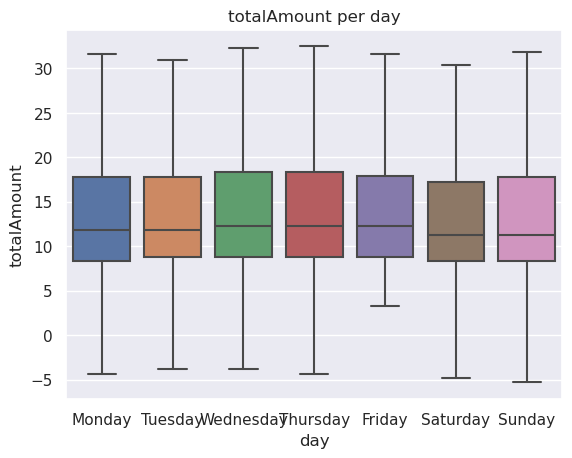

In [40]:
## Define order of days for the plot
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

## Box plot of the distribution grouped by day
g = sns.boxplot(data=Df, 
            x='day',
            y='totalAmount', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('totalAmount per day', );

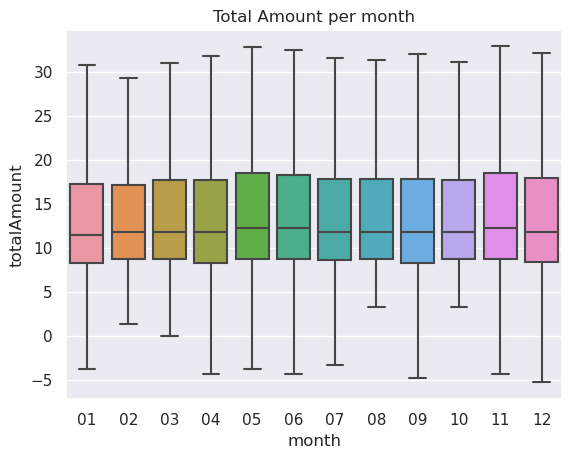

In [41]:
## Define order of days for the plot
## month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ag', 'sep', 'oct', 'nov', 'dec' ]
month_order = ['01', '02','03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ]

## Box plot of the distribution grouped by day
g = sns.boxplot(data=Df, 
            x='month',
            y='totalAmount', 
            order=month_order, 
            showfliers=False 
            );
g.set_title('Total Amount per month', );

In [42]:
## Average distance per location.
Df.groupby('dOffLocID')['distance'].mean()

dOffLocID
1      17.027353
4       2.436634
7       3.964944
9       9.305000
10      3.750000
         ...    
261     4.935897
262     2.866897
263     2.501951
264     2.928783
265    11.039000
Name: distance, Length: 216, dtype: float64

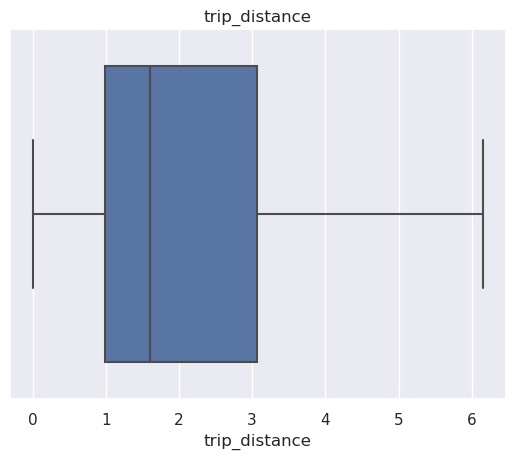

In [43]:
## box plot showing distribution
box = sns.boxplot(x=Df['distance'], showfliers=False,)
g = plt.gca()
plt.xlabel('trip_distance')
plt.title('trip_distance');

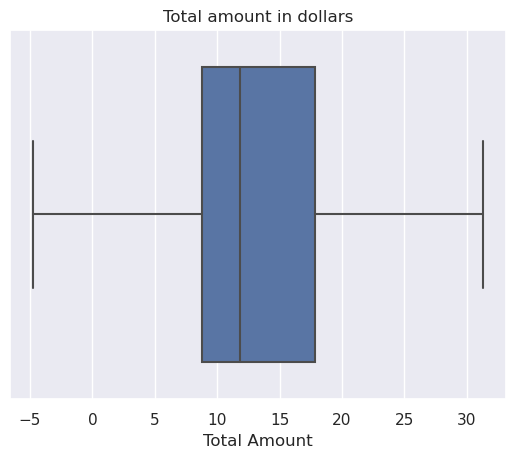

In [44]:
box = sns.boxplot(x=Df['totalAmount'], showfliers=False,)
g = plt.gca()
plt.xlabel('Total Amount')
plt.title('Total amount in dollars');

In [45]:
## Rides where the distance is equal to zero
## One solution could be to use the `travel_time_sec` to infer its values.
dist_zero = (Df['distance'] == 0.0)
missing_distance = Df.iloc[dist_zero.values]    

In [46]:
missing_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 12 to 22667
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   unnamed             148 non-null    int64         
 1   vendorID            148 non-null    int64         
 2   pickup_dt           148 non-null    datetime64[ns]
 3   dropoff_dt          148 non-null    datetime64[ns]
 4   week                148 non-null    object        
 5   month               148 non-null    object        
 6   quarter             148 non-null    object        
 7   day                 148 non-null    object        
 8   hour                148 non-null    object        
 9   tripTime            148 non-null    float64       
 10  distance            148 non-null    float64       
 11  psgr_count          148 non-null    int64         
 12  ratecodeID          148 non-null    int64         
 13  store_and_fwd_flag  148 non-null    int64      

In [47]:
df.shape[0]

22699

In [48]:
missing_distance.shape[0]

148

In [49]:
## we probably can drop them as well
proportion = missing_distance.shape[0] / df.shape[0]
print(f'proportion of events with zero distance: {proportion * 100}%')

proportion of events with zero distance: 0.6520111018106525%


In [50]:
## Investigating the tripTime
## We may be able to get the distance based on the average
## taxi in NYC
missing_distance['tripTime'].describe()

count    148.000000
mean       1.103491
std        3.822957
min        0.000000
25%        0.050000
50%        0.150000
75%        0.508333
max       32.116667
Name: tripTime, dtype: float64

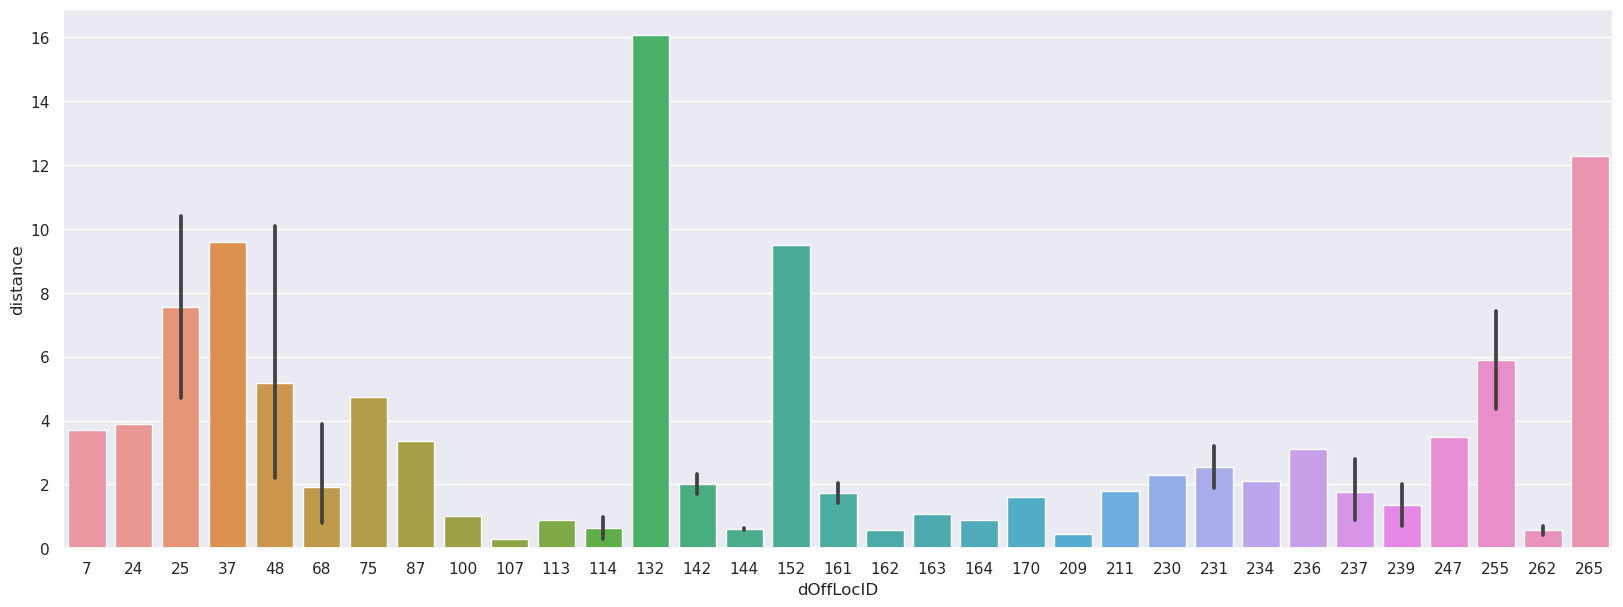

In [51]:
## Randomly selecting and seeing 50 locations
## the darker lines or error bars are graphical representations of the variability 
## of data and used on graphs to indicate the error or uncertainty 
## in a reported measurement, in this case distance.

sample = Df.sample(n=50, replace=True, random_state=42)
plt.figure(figsize=(20,7))
sns.barplot(data=sample, x=sample['dOffLocID'], y=sample['distance']);


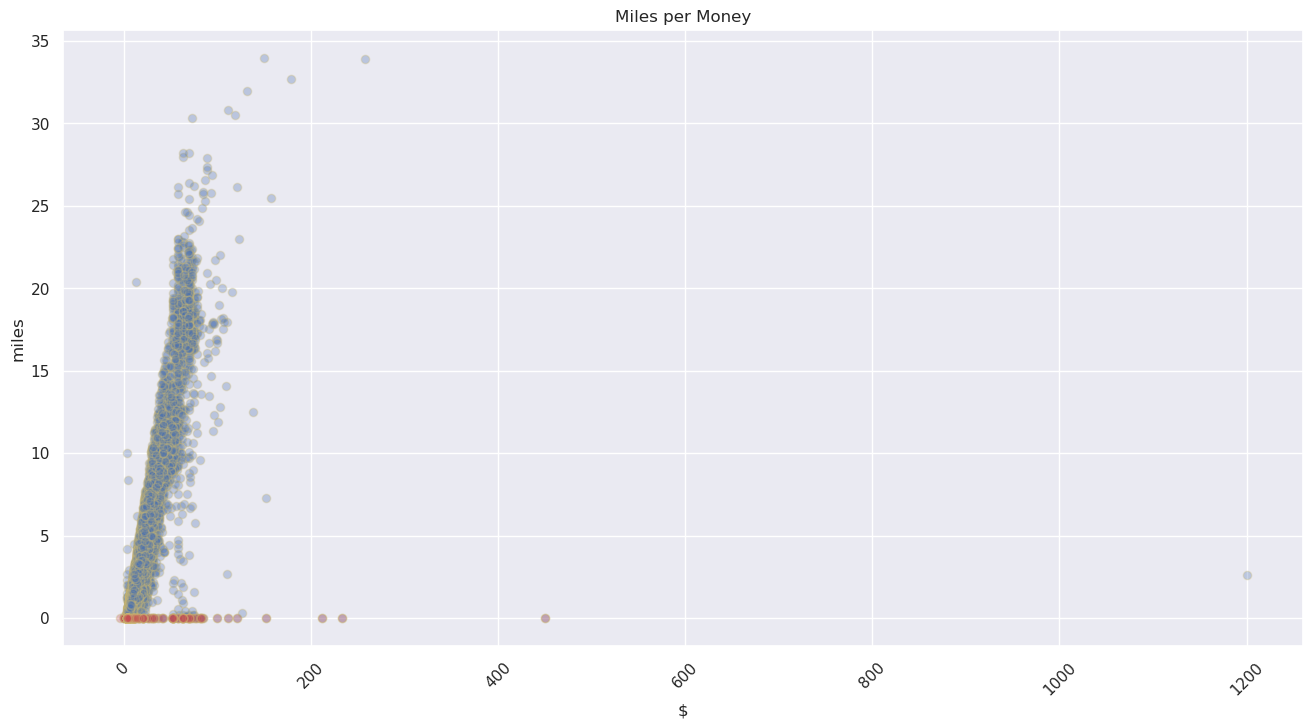

In [52]:
colors = ('b')
colors2 = ('r')

non_zero = Df[Df['distance'] > 0 ]
non_zero = Df[Df['totalAmount'] < 400.0]
non_zero = Df[Df['totalAmount'] > 0]

#non_zero
si_zero = Df[Df['distance'] <= 0]
#si_zero


fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(non_zero['totalAmount'], non_zero['distance'],c=colors, alpha=0.3, edgecolor='y')
ax.scatter(si_zero['totalAmount'], si_zero['distance'],c=colors2, alpha=0.3, edgecolor='y')
ax.set_xlabel('$')
ax.set_ylabel('miles')
ax.set_title('Miles per Money')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

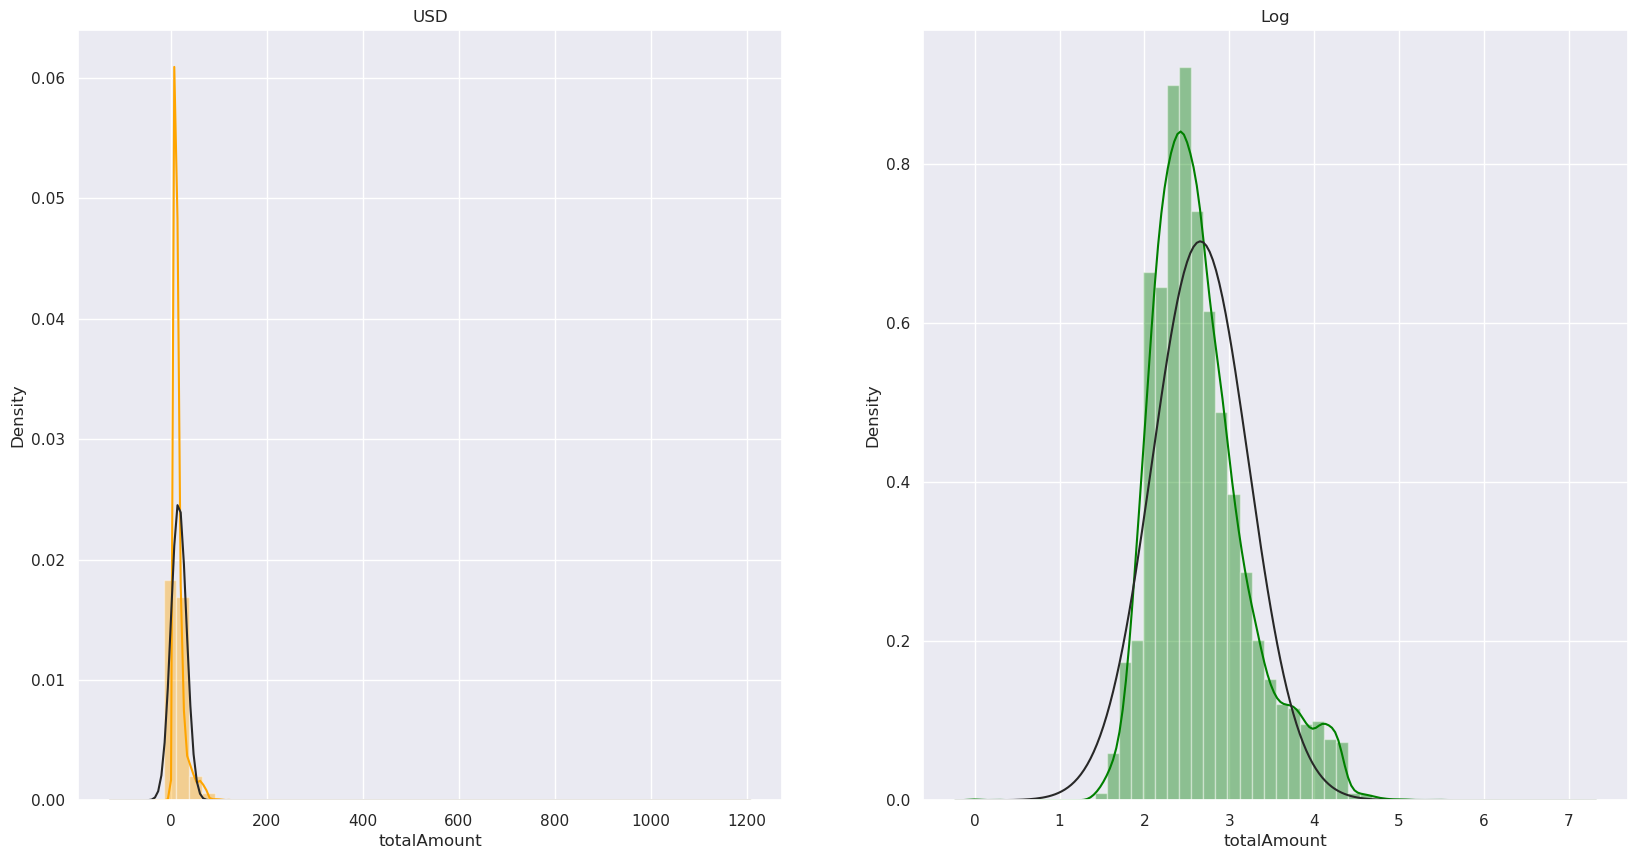

In [53]:
## this is the distibution of the total Amount. I also log it to compare.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(Df['totalAmount'], kde=True, fit=scipy.stats.norm , color='Orange') 
plt.title('USD')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(Df['totalAmount']), kde=True, fit=scipy.stats.norm, color='Green') ## fits is deprecated, still good to demo.
plt.title('Log');

In [54]:
eda.empirical(Df, 'totalAmount')

,totalAmount,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.91,0.680,0.230
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


In [55]:
Df['log'] = np.log1p(Df['totalAmount'])

In [56]:
eda.empirical(Df, 'log')

,log,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.72,0.680,0.040
Frac of the values within +/- 2 SD from the mean,0.94,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007



# Conclusion

From the initial observations:

We have categorical and continuous data.

Although seems like we are not missing values, we are missing information in the distance feature.

The total amount feature is not normally distributed.

We have group data by quarter, months, days, hours and observe measurements of central tendency, dispersion and location.

The data is clean and we need to make some calls related to dropping the examples with missing distance or not.

Latter we need to transform the rest of the features and scale to try to make it look as normal as we can.



In [57]:
## Df.to_csv('/home/gato/Scripts/DS/Statistics/2017_Yellow_Taxi_Trip_Data.csv', index=False)